# Biodiversité des parcs nationaux américains

# Introduction

L'objectif de ce projet est d'étudier la biodiversité au sein de parcs nationaux. Pour cela nous utiliserons des données pour plusieurs espèces observées dans différents lieux. Les données sont produites par le National Parks Service.

En science des données vous devrez préparer les données, les analyser (statistiquement) et produire des figures pertinentes dans l'objectif de répondre à différentes questions.

**Sources:**

Les fichiers `Observations.csv` et `Species_info.csv` ont été récupérés sur [Kaggle](https://www.kaggle.com/code/karthikbhandary2/biodiversity-analysis/notebook).

Remarques: Les données pour ce projet sont inventées bien qu'*inspirées* par des données réelles.

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline	

### Objectifs du projet

Vous êtes une ou un analyste de la biodiversité pour le Service des parcs nationaux. Le National Park Service veut assurer la survie des espèces en péril et maintenir le niveau de biodiversité au sein de leurs parcs. Par conséquent, vos principaux objectifs seront de comprendre les caractéristiques des espèces et leur état de conservation, ainsi que ces espèces et leurs relations avec les parcs nationaux. Quelques questions qui se posent :

- Quelle est la répartition des statuts de conservation des espèces ?
- Certains types d'espèces sont-ils plus susceptibles d'être menacés ?
- Les différences entre les espèces et leur statut de conservation sont-elles significatives ?
- Quel animal est le plus répandu et quelle est sa répartition dans les parcs ?

### Chargement des données

Ce TP contient deux ensembles de données. Le premier fichier `csv` (*comma separated values*) contient des informations sur chaque espèce et un autre contient des observations d'espèces avec des emplacements de parc. Ces données seront utilisées pour analyser répondre aux questions ci-dessus.

### Analyse des données

Des statistiques descriptives et des techniques de visualisation des données seront utilisées pour mieux comprendre les données. L'inférence statistique sera également utilisée pour tester si les valeurs observées sont statistiquement significatives. Certaines des mesures clés qui seront calculées incluent :

1. Distributions
1. comptage
1. relation entre les espèces
1. état de conservation des espèces
1. observations d'espèces dans les parcs.

### Évaluation/Conclusion

Enfin, nous reviendrons aux questions posées. A-t-on pu répondre à toutes les questions? Peut-on aller plus loin ? Nous réfléchirons aux limites/verrons si l'une des analyses aurait pu être effectuée à l'aide de méthodes différentes.


# Chargement des données

Téléchargez les fichiers `observations.csv` et `species_info.csv` sur e-campus et mettez-les sur votre jupyter. 

Chargez les fichiers sous forme de tables (`dataframes`) appelées `species` et `observations` pour `species_info.csv` et `observations.csv` respectivement.

La fonction `.head()` permet d'avoir un apercu du contenu de chaque table.

In [198]:
# VOTRE CODE ICI
species = pd.read_csv("species_info.csv")
observations = pd.read_csv("observations.csv")
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [199]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


#### Caractéristiques des jeux de données

Quelles sont les dimensions des jeux de données ? *Répondez en écrivant une phrase complète et en explicitant le nombre de lignes et de colonnes. N'hésitez pas à ajouter des cellules dans ce notebook.*

In [200]:
# VOTRE CODE ICI
print(species.shape)
print(observations.shape)


(5824, 4)
(23296, 3)


<span style="color:green">
    
Pour faciliter la correction, rédigez vos réponses en vert à l'aide du conteneur HTML `span style="color:green` utilisé comme dans cette cellule.

<span style="color:green">
 
Il y a 4 colonnes et 5824 lignes pour species, pour observations il y a 3 colonnes et 23296 lignes.

Il est temps d'explorer un peu plus en profondeur la table `species`. Répondez aux questions suivantes :

- Combien y a-t-il d'espèces différentes ? Ce nombre est-il égal aux nombre de lignes ? Pourquoi ?

In [201]:
# n'oubliez pas de mettre le code et de rédiger vos réponses. 
# Ajoutez des cellules de code ou de markdown à l'aide de la barre d'outils au dessus du notebook

species_name = species['scientific_name']
nb_species = len(species_name.unique())
print("Nombre d'especes différentes : ", nb_species)


Nombre d'especes différentes :  5541


<span style="color:green">

Il y a 5541 espèces différentes, il y a moins d'espèces différentes que de lignes.

In [202]:
nb_species_dup = species[species_name.duplicated()]
nb_species_dup.head()

,category,scientific_name,common_names,conservation_status
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,NaN
3019,Mammal,Odocoileus virginianus,"White-Tailed Deer, White-Tailed Deer",NaN
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",NaN
3025,Mammal,Lutra canadensis,River Otter,NaN


<span style="color:green">

On remarque qu'il y a des espèces qui ont un nom scientifique identique et des noms communs différents, par exemple Cervus elaphus qui renvoie a 'Wapiti Or Elk' (ligne 4 du tableau)
et a 'Rocky Mountain Elk' (ligne 3017)

In [203]:
species_cer = species[species["scientific_name"] == 'Cervus elaphus']
species_cer.head()

,category,scientific_name,common_names,conservation_status
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,NaN


- Combien y a-t-il de catégories différentes ? A quoi cette colonne correspond-t-elle?

In [204]:
species_category = species['category']
nb_category = len(species_category.unique())
print("Nombre de catégories différentes : ", nb_category)
print(species_category.unique())

Nombre de catégories différentes :  7
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


<span style="color:green">

Il y a seulement 7 catégories différentes, cela correspond aux classes d'êtres vivants

- Combien y a-t-il d'espèces dans chaque catégorie ? Quelle catégorie a le plus (respectivement le moins) d'espèces ? Est-ce surprenant ? Faites une figure pour représenter ce jeu de données

*Remarque : Les Vascular Plant correspondent aux [Trachéophytes](https://fr.wikipedia.org/wiki/Tracheophyta) et regroupent les plantes à fleurs [Angiospermes](https://fr.wikipedia.org/wiki/Angiosperme). Les Nonvascular plant correspondent aux [plantes non-vasculaires](https://fr.wikipedia.org/wiki/Plante_non_vasculaire)*

In [205]:
group_cat = species.groupby('category')
species_count = group_cat['scientific_name'].count()
print(species_count.sort_values())

category
Reptile                79
Amphibian              80
Fish                  127
Mammal                214
Nonvascular Plant     333
Bird                  521
Vascular Plant       4470
Name: scientific_name, dtype: int64


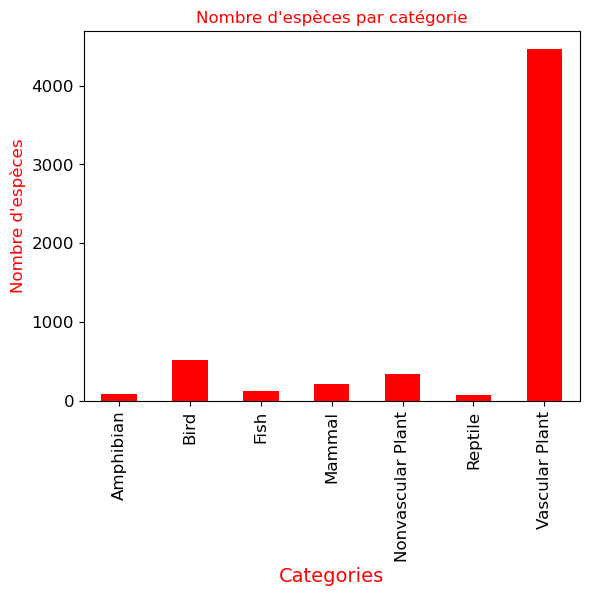

In [206]:
species_count.plot(kind='bar', color='red', fontsize=12)
plt.title('Nombre d\'espèces par catégorie', fontsize=12, color='red')
plt.ylabel('Nombre d\'espèces', fontsize=12, color='red')
plt.xlabel('Categories', fontsize=14, color='red')
plt.show()

<span style="color:green">

La catégorie qui a le plus d'especes sont les plantes vasculaires, ce n'est pas étonnant vu le nombre de plantes qu'il y a sur terre et dans l'ocean.
La catégorie qui a le moins d'especes sont les reptiles, pas étonnant non plus.

- Quels sont les statuts possibles de ces espèces ? Pouvez-vous les trier du moins au plus problématique pour notre problématique de conservation de la biodiversité (faites une recherche internet)?

In [207]:
species_status = species['conservation_status']
print("Les statuts possibles de ces espèces sont : " )

print(species_status.unique())

Les statuts possibles de ces espèces sont : 
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


<span style="color:green">

Du moins problématique au plus problématique : 
- In recovery (En rétablissement)
- Species of concern (Préoccupant)
- Threatened (Espèce menacée)
- Endangered (En danger d'extinction)

- Ensuite, effectuez un décompte du nombre d'observations dans la répartition des catégories dans `conservation_status`. A votre avis, que signifie une valeur `nan` ? Faites une figure pour représenter ces données.

La colonne `conservation_status` a plusieurs valeurs possibles:
- `Species of Concern`: "Espèces préoccupantes", en déclin ou qui semblent avoir besoin d'être conservées
- `Threatened`: "Menacées" : vulnérable à une mise en danger dans un avenir proche
- `Endangered`: "En danger" : gravement menacées d'extinction
- `In Recovery`: "En rétablissement" : anciennement "Endangered", mais actuellement plus en danger d'extinction dans l'ensemble ou dans une part importante de son aire de répartition

In [208]:
species['COUNTER'] = 1 
group_status = species.groupby(['category','conservation_status'])['COUNTER'].sum()
print(group_status)

category           conservation_status
Amphibian          Endangered              1
                   Species of Concern      4
                   Threatened              2
Bird               Endangered              4
                   In Recovery             3
                   Species of Concern     72
Fish               Endangered              3
                   Species of Concern      4
                   Threatened              4
Mammal             Endangered              7
                   In Recovery             1
                   Species of Concern     28
                   Threatened              2
Nonvascular Plant  Species of Concern      5
Reptile            Species of Concern      5
Vascular Plant     Endangered              1
                   Species of Concern     43
                   Threatened              2
Name: COUNTER, dtype: int64


Text(0.5, 1.0, 'répartition des catégories dans chaque statut de conservation')

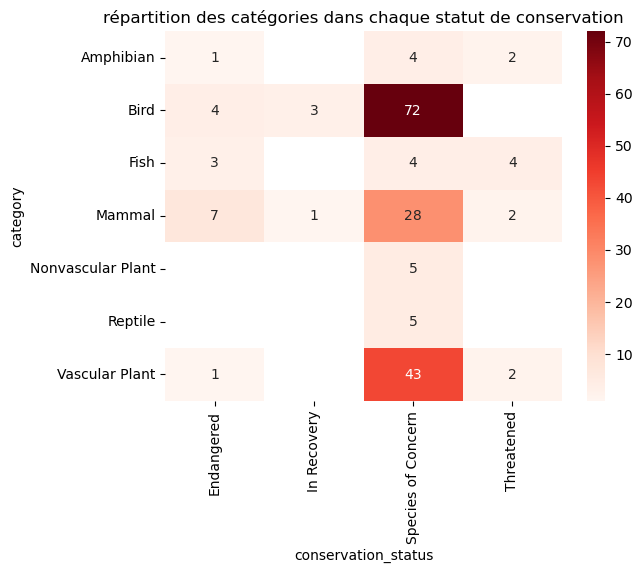

In [209]:
sns.heatmap(group_status.unstack(), annot=True, cmap= 'Reds')
plt.title("répartition des catégories dans chaque statut de conservation")

#### Jeu de données `observations`

On passe à l'observation de l'autre table, `observations`.

- Combien de parcs sont étudiés ? Ou se situent-ils (faites une recherche internet) ?

In [210]:
parc = observations["park_name"].unique()
print("LES DIFFERENTS PARCS NATIONAUX : ")
print(parc)
print("LE NOMBRE DE PARCS : ")
print(len(parc))

LES DIFFERENTS PARCS NATIONAUX : 
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
LE NOMBRE DE PARCS : 
4


<span style="color:green">
    
On étudie 4 parcs : 
    
- Great Smoky Mountains National Park
- Yosemite National Park
- Bryce National Park
- Yellowstone National Park


- Quelle est l'espèce la plus observée (et qu'est-ce que c'est ?) ? 

In [211]:
observations_spe = observations.groupby('scientific_name')['observations'].sum()
print(observations_spe.sort_values(ascending=False))

scientific_name
Streptopelia decaocto    1785
Holcus lanatus           1780
Castor canadensis        1725
Hypochaeris radicata     1720
Puma concolor            1711
                         ... 
Rana sierrae              144
Noturus baileyi           143
Vermivora bachmanii       141
Canis rufus               137
Grus americana            131
Name: observations, Length: 5541, dtype: int64


In [212]:
species.drop('COUNTER', inplace=True, axis=1)
most_obs = species[species["scientific_name"] == 'Streptopelia decaocto']
most_obs.head()

,category,scientific_name,common_names,conservation_status
3077,Bird,Streptopelia decaocto,Eurasian Collared-Dove,NaN
3140,Bird,Streptopelia decaocto,"Eurasian Collared Dove, Eurasian Collared-Dove",NaN
4514,Bird,Streptopelia decaocto,Eurasian Collared Dove,NaN


<span style="color:green">
L'espèce la plus observée est la Tourterelle turque (Eurasian Collared Dove). 	

- Dans quel parc trouve-t-on le plus d'observations ?

In [249]:
observations_parc = observations.groupby(['park_name','scientific_name'])['observations'].sum()
print(observations_parc.sort_values(ascending=False))

park_name                            scientific_name      
Yellowstone National Park            Holcus lanatus           805
                                     Streptopelia decaocto    771
                                     Puma concolor            753
                                     Procyon lotor            745
                                     Hypochaeris radicata     726
                                                             ... 
Great Smoky Mountains National Park  Sambucus mexicana         12
                                     Strix occidentalis        11
                                     Rana sierrae              11
                                     Collomia tinctoria        10
Bryce National Park                  Corydalis aurea            9
Name: observations, Length: 22164, dtype: int64


<span style="color:green">

C'est dans le Yellowstone National Park qu'on compte le plus d'observations de tourterelle turque

# Analyse des données

La première étape est de nettoyer et préparer les données 

- Dans la colonne `conservation_status` de la table `species`, remplacez les valeurs `nan` par `No Intervention`. En effet, `nan` signifie qu'il n'y a pas de spécification de conservation.

In [214]:
species['conservation_status'].fillna("No Intervention", inplace=True)
species.head(15)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


- Explorez les différents statuts de conservation. Commencez par éliminer ceux sans intervention. Puis pour chaque statut, 1) comptez le nombre d'occurences des différentes `category` et 2) représentez le nombre d'espèces en fonction du statut (figure de type barplot stacked). Quel type d'être vivant est particulièrement en danger ? Commentez votre figure.

In [215]:
observations_status = species[species.conservation_status != "No Intervention"]
observations_status.head(15)

,category,scientific_name,common_names,conservation_status
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern
33,Mammal,Myotis austroriparius,"Mississippi Myotis, Southeastern Myotis",Species of Concern
34,Mammal,Myotis grisescens,Gray Myotis,Endangered
35,Mammal,Myotis keenii,Keen's Myotis,Species of Concern
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern


In [216]:
species['COUNTER'] = 1 
cat_status = species.groupby(['conservation_status','category'])['COUNTER'].sum()
print(cat_status)

conservation_status  category         
Endangered           Amphibian               1
                     Bird                    4
                     Fish                    3
                     Mammal                  7
                     Vascular Plant          1
In Recovery          Bird                    3
                     Mammal                  1
No Intervention      Amphibian              73
                     Bird                  442
                     Fish                  116
                     Mammal                176
                     Nonvascular Plant     328
                     Reptile                74
                     Vascular Plant       4424
Species of Concern   Amphibian               4
                     Bird                   72
                     Fish                    4
                     Mammal                 28
                     Nonvascular Plant       5
                     Reptile                 5
                     

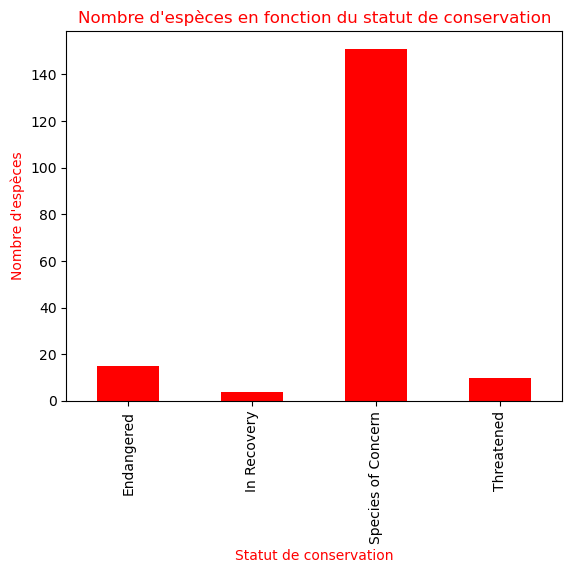

In [217]:
observations_stat = observations_status.groupby('conservation_status')["scientific_name"].nunique()

observations_stat.plot(kind="bar", stacked = True, color="red")
plt.xlabel("Statut de conservation", color="red")
plt.ylabel("Nombre d'espèces",color="red")
plt.title("Nombre d'espèces en fonction du statut de conservation", color="red")

plt.show()

A l'aide des analyses précédentes, répondez à la question initiale en quelques phrases: *Quelle est la répartition des statuts de conservation des espèces ?*

<span style="color:green">
On remarque que la majorité des animaux dans la catégorie 'species of concern' sont de la catégorie des oiseaux, de plus ce statut de conservation est
celui qui compte le plus d'espèces (et de loin). On peut donc dire que les espèces les plus menacées sont les oiseaux. 

#### Conservation

On passe maintenant à la deuxième question : quelles sont les espèces plus susceptibles d'être suivies dans le cadre de la conservation ? 

- Créez une nouvelle colonne `is_protected` qui vaut `False` pour toute espèces étant `No Intervention` et `True``sinon.

In [218]:
species.drop('COUNTER', inplace=True, axis=1)
species['is_protected'] = np.where(species['conservation_status'] == 'No Intervention', False, True)
species.head(15)

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True
8,Mammal,Canis lupus,Gray Wolf,Endangered,True
9,Mammal,Canis rufus,Red Wolf,Endangered,True


- Pour chaque `category` calculez la proportion d'espèces protégées. Observez les résultats.

In [219]:
protected_cat = species.groupby('category')["is_protected"].value_counts()
print(protected_cat)

category           is_protected
Amphibian          False             73
                   True               7
Bird               False            442
                   True              79
Fish               False            116
                   True              11
Mammal             False            176
                   True              38
Nonvascular Plant  False            328
                   True               5
Reptile            False             74
                   True               5
Vascular Plant     False           4424
                   True              46
Name: is_protected, dtype: int64


In [220]:
species_protcat = species.groupby(['category']).describe()
species_protcat.head()

scientific_name                                     \
                            count unique                    top freq   
category                                                               
Amphibian                      80     79       Rana catesbeiana    2   
Bird                          521    488          Columba livia    3   
Fish                          127    125  Salvelinus fontinalis    2   
Mammal                        214    176      Castor canadensis    3   
Nonvascular Plant             333    333        Andreaea rothii    1   

                  common_names                                     \
                         count unique                    top freq   
category                                                            
Amphibian                   80     80  Eastern American Toad    1   
Bird                       521    481     Brewster's Warbler    3   
Fish                       127    122        Mottled Sculpin    2   
Mammal                     214    205      Big-Eared Woodrat    2   
Nonvascular Plant          333    246     Brachythecium Moss    7   

                  conservation_status                               \
                                count unique              top freq   
category                                                             
Amphibian                          80      4  No Intervention   73   
Bird                              521      4  No Intervention  442   
Fish                              127      4  No Intervention  116   
Mammal                            214      5  No Intervention  176   
Nonvascular Plant                 333      2  No Intervention  328   

                  is_protected                     
                         count unique    top freq  
category                                           
Amphibian                   80      2  False   73  
Bird                       521      2  False  442  
Fish                       127      2  False  116  
Mammal                     214      2  False  176  
Nonvascular Plant          333      2  False  328

In [221]:
species_protcat['proportion'] = (1-( species_protcat["is_protected","freq"] / species_protcat["is_protected","count"] ) )*100
species_protcat.head()

scientific_name                                     \
                            count unique                    top freq   
category                                                               
Amphibian                      80     79       Rana catesbeiana    2   
Bird                          521    488          Columba livia    3   
Fish                          127    125  Salvelinus fontinalis    2   
Mammal                        214    176      Castor canadensis    3   
Nonvascular Plant             333    333        Andreaea rothii    1   

                  common_names                                     \
                         count unique                    top freq   
category                                                            
Amphibian                   80     80  Eastern American Toad    1   
Bird                       521    481     Brewster's Warbler    3   
Fish                       127    122        Mottled Sculpin    2   
Mammal                     214    205      Big-Eared Woodrat    2   
Nonvascular Plant          333    246     Brachythecium Moss    7   

                  conservation_status                               \
                                count unique              top freq   
category                                                             
Amphibian                          80      4  No Intervention   73   
Bird                              521      4  No Intervention  442   
Fish                              127      4  No Intervention  116   
Mammal                            214      5  No Intervention  176   
Nonvascular Plant                 333      2  No Intervention  328   

                  is_protected                    proportion  
                         count unique    top freq             
category                                                      
Amphibian                   80      2  False   73       8.75  
Bird                       521      2  False  442  15.163148  
Fish                       127      2  False  116   8.661417  
Mammal                     214      2  False  176  17.757009  
Nonvascular Plant          333      2  False  328   1.501502

<span style="color:green">

On remarque que ce sont les mammifères qui sont les plus observés (17%)

#### Tests statistiques

Afin de déterminer si les différences entre les catégories sont significatives ou pas, il faut faire des tests statistiques. Vous allez éxécuter un [test du chi-2](https://fr.wikipedia.org/wiki/Test_du_%CF%87%C2%B2) qui permet de voir si différentes catégories présentent des différences statistiquement significatives dans les taux de statut de conservation. Ce test, non paramétrique, se base sur une table de contingence et compare si la répartition est homogène entre les 2 catégories. Une telle table ressemble à cela:


||protected|not protected|
|-|-|-|
|Non-vascular plant|?|?|
|Vascular plant|?|?|

Commencons par tester si les deux catégories de plantes ont des taux de conservation similaires. La table de contingence est donnée ci-dessous `contingency1`

Le calcul du X2 retourne plusieurs valeurs. La deuxième valeur est la p-value, ici 0.69 et est à comparer à la p-value standard des test de significance 0.05 (5% de la queue de distribution). Pour un rappel en statistiques, revoir le cours d'Introduction à la Science des données de Mme Guyon (L1) ou de Mr Evrard (L2).

Ici, 0.69 > 0.05 donc les plantes vasculaires ou non semblent suivre la même répartition en terme de protection.

In [222]:
from scipy.stats import chi2_contingency

#Table de contingence MPlantes non-vascaulaires versus vasculaires
contingency1 = [[5, 328],
              [46,4126]]
#Calcul du X2
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=0.15447053643010147, pvalue=0.694299244877863, dof=1, expected_freq=array([[3.76981132e+00, 3.29230189e+02],
       [4.72301887e+01, 4.12476981e+03]]))

Refaites la même analyse pour `Vascular Plant` et `Mammal`.

Commencez par la table de contingence puis faites le test en analyser les résultats.

||protected|not protected|
|-|-|-|
|Mammal|38|176|
|Vascular Plant|46|4424|



In [223]:
contingency2 = [[38,176],[46,4424]]


chi2_contingency(contingency2)

Chi2ContingencyResult(statistic=315.04938977522016, pvalue=1.7349112437604003e-70, dof=1, expected_freq=array([[3.83774552e+00, 2.10162254e+02],
       [8.01622545e+01, 4.38983775e+03]]))

Répondez à la deuxième question du TP (en faisant d'autres analyses si nécessaire): *quelles sont les espèces plus susceptibles d'être suivies dans le cadre de la conservation ?*

<span style="color:green">

notre pvalue est très inférieure à 0,05 donc les mammifères et les plantes vasculaires ne semblent pas suivre la même répartition en terme de protection

#### Espèces dans les parcs

La première étape consiste à examiner les noms communs(`common_names`) de `species` pour avoir une idée des animaux les plus répandus. 

Regardez les noms d'espèces:

In [224]:
print(species.common_names[:6])

0                             Gapper's Red-Backed Vole
1                                American Bison, Bison
2    Aurochs, Aurochs, Domestic Cattle (Feral), Dom...
3    Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)
4                                        Wapiti Or Elk
5                                    White-Tailed Deer
Name: common_names, dtype: object


Il y a des doublons. Commencons par nettoyer les données:

In [225]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

#On supprime la ponctuation des noms
common_Names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

On supprime les doublons pour chaque espèce (comme Aurochs en 3ème position):

In [226]:
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [227]:
#On fusionne tous les noms d'espèces
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

On peut maitenant comptez le nombre d'apparition d'un terme. Par exemple `Bat` (pour chauve-souris) apparait 23 fois.

In [228]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

,Word,Count
102,Bat,23
134,Shrew,18
42,Myotis,17
90,Mouse,16
0,Chipmunk,13
104,American,12
27,Squirrel,12
143,Eastern,11
56,Vole,11
35,Mountain,10


- Crééz une nouvelle colonne `is_bat` qui vaut `True` si Bat est inclus dans le nom de l'espèce et `False` sinon.

In [229]:
species['is_bat'] = False
cond = species['common_names'].str.contains('Bat')
species.loc[cond,'is_bat'] = True
species_bat = species[species["is_bat"] == True]
species_bat.head()

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True


In [230]:
species.head()

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False


- Affichez les espèces de chauve-souris. Sont-elles toutes protégées? A quelle(s) catégorie(s) appartiennent-elles ?

In [231]:
print("Les différentes espèces de chauves souris sont : " )

species_bat.head(24)


Les différentes espèces de chauves souris sont : 


,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


<span style="color:green">
Les chauves-souris appartiennent aux mammifères, elles ne sont pas toutes protégées.

Fusionnez la table des chauves-souris avec celle des `observations`. 
- Combien y a-t-il de lignes ?

In [232]:
result = observations.merge(species_bat,how="inner",on="scientific_name")
result.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True


In [233]:
result.shape

(152, 8)

<span style="color:green">
Il y a 152 lignes.

- Combien de chauves-souris ont été observées pour chaque parc ? Sont-elles majoritairememt protégées ou pas ? Commentez.

In [234]:
park_bat = result.groupby(['park_name'])['observations'].sum()
print(park_bat)

park_name
Bryce National Park                    3625
Great Smoky Mountains National Park    2513
Yellowstone National Park              8901
Yosemite National Park                 5104
Name: observations, dtype: int64


In [235]:
bat_prot = result.groupby(['scientific_name'])['is_protected'].sum()
print(bat_prot)

scientific_name
Antrozous pallidus            4
Centaurea cyanus              0
Corynorhinus rafinesquii      0
Corynorhinus townsendii       0
Eptesicus fuscus             16
Euderma maculatum             4
Eumops perotis                0
Lasionycteris noctivagans    16
Lasiurus blossevillii         4
Lasiurus borealis             0
Lasiurus cinereus             0
Myotis ciliolabrum            0
Myotis leibii                 4
Myotis lucifugus             24
Myotis septentrionalis        4
Myotis sodalis                4
Nycticeius humeralis          0
Parastrellus hesperus         0
Tadarida brasiliensis         0
Name: is_protected, dtype: int64


<span style="color:green">

Majoritairement, elles ne sont pas protégées.

- Tracez le nombre d'observations entre les espèces de chauves-souris protégées ou non et ce pour chaque parc (faire un barplot). Quelle différence y a-t-il entre les parcs ?

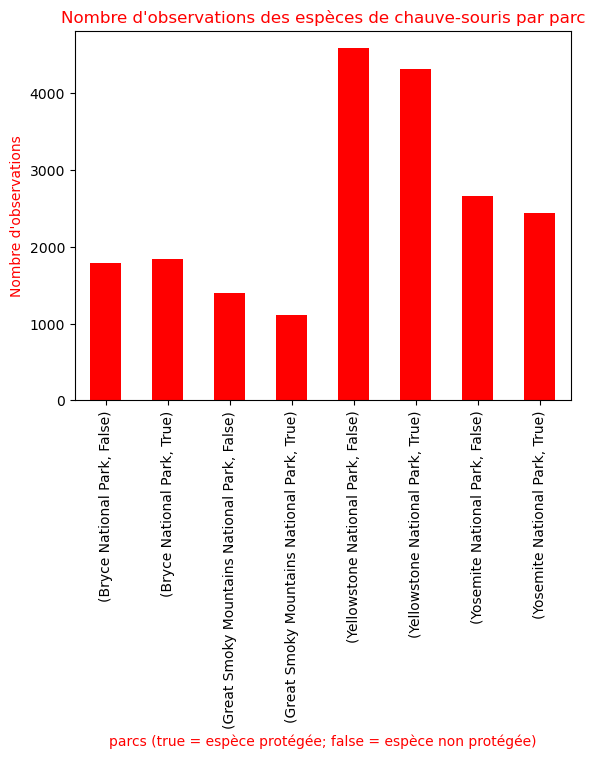

In [244]:
park_protected = result.groupby(['park_name','is_protected'])['observations'].sum()

park_protected.plot(kind="bar", stacked = True, color="red")
plt.xlabel("parcs (true = espèce protégée; false = espèce non protégée)", color="red")
plt.ylabel("Nombre d'observations",color="red")
plt.title("Nombre d'observations des espèces de chauve-souris par parc", color="red")

plt.show()

<span style="color:green">
On remarque qu'il y a plus ou moins autant d'espèces protégées que non protégées au sein d'un même parc, la différence se fait entre les parcs au niveaux du nombre d'observations. 

# Evaluation/Conclusions

Ce TP a permis d'analyser la composition en être vivants de 4 parcs nationaux. N'hésitez pas à porposer d'autres analyses.
Répondez de facon succinte aux questions suivantes:


- Quelle est la répartition des statuts de conservation des espèces ?

- Certains types d'espèces sont-ils plus susceptibles d'être menacés ?

- Les différences entre les espèces et leur statut de conservation sont-elles significatives ?

- Quel animal est le plus répandu et quelle est sa répartition dans les parcs ?



<span style="color:green">
La répartition des statuts de conservation des espèces est très inégale, en effet la grande majorité des espèces sont dans dans le statut 'Species of concern'

<span style="color:green">
Il existe des types d'espèces plus menacés que d'autres, les oiseaux par exemple.

<span style="color:green">
Les différences sont effectivement significatives.

<span style="color:green">
L'animal le plus répandu est la chauve souris, c'est dans le Yellowstone National Park qu'on en trouve le plus.

Nous avons travaillé sur des données fictionnelles. Dans le prochain mini-projet, nous analyserons des données réelles issues d'un papier scientifique.

Prenez un peu de recul. Selon vous, quelles sont les difficultés que nous rencontrerons à travailler sur des données réelles ? 

<span style="color:green">

Nous pouvons faire face à des problèmes diverses, par exemple la qualité des données, quantité de données, l'hétérogénéité des données... 